In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from helpers.helper_functions import *

# The Significant Bang Theory

Attention, ADA students!

The Sheldon Cooper we all know and love (OK, some of us might not know him, and some might not love him) from the TV series "The Big Bang Theory" has gotten into an argument with Leonard from the same TV show. Sheldon insists that he knows the show better than anyone, and keeps making various claims about the show, which neither of them know how to prove or disprove. The two of them have reached out to you ladies and gentlemen, as data scientists, to help them. You will be given the full script of the series, with information on the episode, the scene, the person saying each dialogue line, and the dialogue lines themselves.

Leonard has challenged several of Sheldon's claims about the show, and throughout this exam you will see some of those and you will get to prove or disprove them, but remember: sometimes, we can neither prove a claim, nor disprove it!

## Deadline
Wednesday, January 30th, 2019; 11:15 A.M. (Swiss time)

_For the deadline for extramural exams, see the submission subsection._

## Important notes
* Don't forget to add a textual description of your thought process, the assumptions you made, and your results!
* Please write all your comments in English, and use meaningful variable names in your code.
* As we have seen during the semester, data science is all about multiple iterations on the same dataset. Do not obsess over small details in the beginning, and try to complete as many tasks as possible during the first 2 hours. Then, go back to the obtained results, write meaningful comments, and debug your code if you have found any glaring mistake.
* Fully read the instructions for each question before starting to solve it to avoid misunderstandings, and remember to save your notebook often!
* The exam contains **15 questions organised into 4 tasks**, and is designed for more than 3 hours. **You do not need to solve everything in order to get a 6**, and you have some freedom is choosing the tasks you wish to solve.
* You cannot leave the room in the first and last 15 minutes.
* You can use all the online resources you want except for communication tools (emails, web chats, forums, phone, etc.). We will be monitoring the network for unusual activity.
* Remember, this is not a homework assignment -- no teamwork allowed!

## Submission
* Your file has to be named as "NameSurname_SCIPER.ipynb".
* Make sure you upload your Jupyter Notebook (1 file) to [this](https://goo.gl/forms/7GLvYl94uSOn54jH2) Google form at the end of the exam, with all the cells already evaluated (except for the Spark-related question, Q7). You need to sign in to Google using your EPFL credentials in order to submit the form.
* In case of problems with the form, send your Jupyter Notebook (along with your name and SCIPER number) as a direct message to @ramtin on Mattermost. This is reserved only for those who encounter problems with the submission -- you need to have a reasonable justification for using this back-up.
* You will have until 11:20 (strict deadline) to turn in your submission. **Late submissions will not be accepted.** This deadline is for the students taking the exam at EPFL -- students taking the exam extramurally will have their submission deadline as the starting time of the exam plus 3 hours and 5 minutes.

## Task A: Picking up the shovel (10 points)

**Note: You will use the data you preprocess in this task in all the subsequent ones.**

Our friends' argument concerns the entire show. We have given you a file in the `data/` folder that contains the script of every single episode. New episodes are indicated by '>>', new scenes by '>', and the rest of the lines are dialogue lines. Some lines are said by multiple people (for example, lines indicated by 'All' or 'Together'); **you must discard these lines**, for the sake of simplicity. However, you do not need to do it for Q1 in this task -- you'll take care of it when you solve Q2.

**Q1**. (5 points) Your first task is to extract all lines of dialogue in each scene and episode, creating a dataframe where each row has the episode and scene where a dialogue line was said, the character who said it, and the line itself. You do not need to extract the proper name of the episode (e.g. episode 1 can appear as "Series 01 Episode 01 - Pilot Episode", and doesn't need to appear as "Pilot Episode"). Then, answer the following question: In total, how many scenes are there in each season? We're not asking about unique scenes; the same location appearing in two episodes counts as two scenes. You can use a Pandas dataframe with a season column and a scene count column as the response.

**Note: The data refers to seasons as "series".**

In [2]:
df = pd.read_csv('./data/all_scripts.txt', sep='\n', header=None)
df.columns = ['Val']

In [3]:
for i, row in enumerate(df.values):
    row = row[0]
    if row.startswith('>> '):
        episode = row[3:]
    elif row.startswith('> '):
        scene = row[2:]
    else: 
        df.at[i, 'Episode'] = episode
        df.at[i, 'Season'] = episode.split()[1]
        df.at[i, 'Scene'] = scene
        splitted = row.split(': ')
        df.at[i, 'Character'] = splitted[0]
        df.at[i, 'Line'] = ''.join(splitted[1:])

df.head()

,Val,Episode,Season,Scene,Character,Line
0,>> Series 01 Episode 01 – Pilot Episode,NaN,NaN,NaN,NaN,NaN
1,> A corridor at a sperm bank.,NaN,NaN,NaN,NaN,NaN
2,Sheldon: So if a photon is directed through a ...,Series 01 Episode 01 – Pilot Episode,01,A corridor at a sperm bank.,Sheldon,So if a photon is directed through a plane wit...
3,"Leonard: Agreed, what’s your point?",Series 01 Episode 01 – Pilot Episode,01,A corridor at a sperm bank.,Leonard,"Agreed, what’s your point?"
4,"Sheldon: There’s no point, I just think it’s a...",Series 01 Episode 01 – Pilot Episode,01,A corridor at a sperm bank.,Sheldon,"There’s no point, I just think it’s a good ide..."


In [4]:
df = df.dropna()
df.drop('Val', axis=1, inplace=True)
df.head()

,Episode,Season,Scene,Character,Line
2,Series 01 Episode 01 – Pilot Episode,01,A corridor at a sperm bank.,Sheldon,So if a photon is directed through a plane wit...
3,Series 01 Episode 01 – Pilot Episode,01,A corridor at a sperm bank.,Leonard,"Agreed, what’s your point?"
4,Series 01 Episode 01 – Pilot Episode,01,A corridor at a sperm bank.,Sheldon,"There’s no point, I just think it’s a good ide..."
5,Series 01 Episode 01 – Pilot Episode,01,A corridor at a sperm bank.,Leonard,Excuse me?
6,Series 01 Episode 01 – Pilot Episode,01,A corridor at a sperm bank.,Receptionist,Hang on.


In [5]:
df.groupby(['Season', 'Episode'])[['Scene']].nunique().reset_index().groupby(['Season']).sum().rename(columns={'Scene': 'Scene count'})

,Scene count
Season,
01,157
02,205
03,193
04,219
05,198
06,211
07,207
08,191
09,177


**Q2**. (5 points) Now, let's define two sets of characters: all the characters, and recurrent characters. Recurrent characters are those who appear in more than one episode. For the subsequent sections, you will need to have a list of recurrent characters. Assume that there are no two _named characters_ (i.e. characters who have actual names and aren't referred to generically as "little girl", "grumpy grandpa", etc.) with the same name, i.e. there are no two Sheldons, etc. Generate a list of recurrent characters who have more than 90 dialogue lines in total, and then take a look at the list you have. If you've done this correctly, you should have a list of 20 names. However, one of these is clearly not a recurrent character. Manually remove that one, and print out your list of recurrent characters. To remove that character, pay attention to the _named character_ assumption we gave you earlier on. **For all the subsequent questions, you must only keep the dialogue lines said by the recurrent characters in your list.**

_Hint: "I know all the recurrent characters because I've watched the entire series five times" is not an acceptable argument, so you need to actually generate the list._

In [6]:
from collections import defaultdict

recurrent = defaultdict(int)
for ep in df.groupby(['Episode'])['Character'].apply(lambda x: x.to_list()):
    for c in ep:
        recurrent[c] += 1

recurrent = [k for (k, v) in zip(recurrent.keys(), recurrent.values()) if v > 90]

In [7]:
len(recurrent)

20

In [8]:
recurrent.remove('Man')
recurrent

['Sheldon',
 'Leonard',
 'Penny',
 'Howard',
 'Raj',
 'Mrs Cooper',
 'Leslie',
 'Kripke',
 'Beverley',
 'Stuart',
 'Bernadette',
 'Wil',
 'Mrs Wolowitz',
 'Zack',
 'Amy',
 'Priya',
 'Arthur',
 'Bert',
 'Emily']

In [9]:
df = df[df['Character'].isin(recurrent)]
df.head()

,Episode,Season,Scene,Character,Line
2,Series 01 Episode 01 – Pilot Episode,01,A corridor at a sperm bank.,Sheldon,So if a photon is directed through a plane wit...
3,Series 01 Episode 01 – Pilot Episode,01,A corridor at a sperm bank.,Leonard,"Agreed, what’s your point?"
4,Series 01 Episode 01 – Pilot Episode,01,A corridor at a sperm bank.,Sheldon,"There’s no point, I just think it’s a good ide..."
5,Series 01 Episode 01 – Pilot Episode,01,A corridor at a sperm bank.,Leonard,Excuse me?
7,Series 01 Episode 01 – Pilot Episode,01,A corridor at a sperm bank.,Leonard,"One across is Aegean, eight down is Nabakov, t..."


## Task B: Read the ~~stats~~ scripts carefully (30 points)

### Part 1: Don't put the shovel down just yet

**Q3**. (2.5 points) From each dialogue line, replace punctuation marks (listed in the EXCLUDE_CHARS variable provided in `helpers/helper_functions.py`) with whitespaces, and lowercase all the text. **Do not remove any stopwords, leave them be for all the questions in this task.**

In [10]:
def replace_and_lowercase(line):
    for c in EXCLUDE_CHARS:
        if c in line:
            line = line.replace(c, ' ')
            
    return line.lower()

In [11]:
df['Line'] = df['Line'].apply(replace_and_lowercase)
df.head()

,Episode,Season,Scene,Character,Line
2,Series 01 Episode 01 – Pilot Episode,01,A corridor at a sperm bank.,Sheldon,so if a photon is directed through a plane wit...
3,Series 01 Episode 01 – Pilot Episode,01,A corridor at a sperm bank.,Leonard,agreed what s your point
4,Series 01 Episode 01 – Pilot Episode,01,A corridor at a sperm bank.,Sheldon,there s no point i just think it s a good ide...
5,Series 01 Episode 01 – Pilot Episode,01,A corridor at a sperm bank.,Leonard,excuse me
7,Series 01 Episode 01 – Pilot Episode,01,A corridor at a sperm bank.,Leonard,one across is aegean eight down is nabakov t...


**Q4**. (5 points) For each term, calculate its "corpus frequency", i.e. its number of occurrences in the entire series. Visualize the distribution of corpus frequency using a histogram. Explain your observations. What are the appropriate x and y scales for this plot?

In [12]:
df_terms = df.copy()
df_terms['Line'] = df_terms['Line'].apply(lambda l: l.split())
df_terms = df_terms.explode('Line')

One of these two plots is correct. Zipf' Law can clearly be seen here.

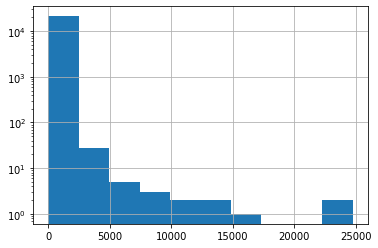

In [13]:
df_terms['Line'].value_counts().hist(log=True)

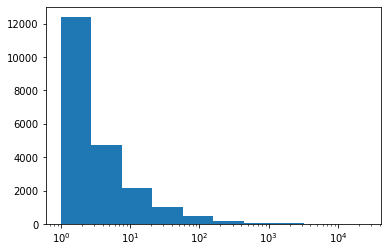

In [14]:
hist, bins = np.histogram(df_terms['Line'].value_counts())
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(df_terms['Line'].value_counts(), bins=logbins)
plt.xscale('log')

### Part 2: Talkativity
**Q5**. (2.5 points) For each of the recurrent characters, calculate their total number of words uttered across all episodes. Based on this, who seems to be the most talkative character?

In [15]:
df.groupby(['Character'])['Line'].apply(lambda x: x.str.rstrip().str.split('\W+').explode().count()).sort_values(ascending=False)

Character
Sheldon         185612
Leonard         102643
Penny            79379
Howard           69577
Raj              60151
Amy              39959
Bernadette       27745
Stuart            7966
Mrs Cooper        3396
Beverley          2029
Priya             1942
Wil               1681
Emily             1573
Mrs Wolowitz      1460
Arthur            1452
Zack              1428
Leslie            1252
Kripke            1246
Bert              1146
Name: Line, dtype: int64

The most talkative character is Sheldon.

**Q6**. (12.5 points) For each of the recurrent characters, calculate their total number of words uttered per episode (ignoring episodes that the character does not appear in), and calculate a **robust summary statistic** for the word count distribution of each person.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**i)** (2.5 points) What changes do you observe, compared to the analysis in Q5?

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**ii)** (2.5 points) Why is this analysis an improvement over the previous one, and how could you improve it even further? _Hint: The improvement involves making your unit for word counts even more granular - you can go further down than episodes._

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**iii)** (7.5 points) Incorporate that improvement. Do you still see the same results? How **confident** can you be that the "most talkative" person given by this twice improved method is really more talkative than the second most talkative one? _Hint: Read the question again. A good idea would be to use bootstrapping and calculate your summary statistic on each bootstrapped set._

In [16]:
words_per_ep_per_ch = df.groupby(['Character', 'Episode'])['Line'].apply(lambda x: x.str.rstrip().str.split('\W+').explode().count())

A more robust statistic could be the median of the word count per episode.

In [17]:
words_per_ep_per_ch.groupby(['Character']).median().sort_values(ascending=False)

Character
Sheldon         777.0
Leonard         398.0
Arthur          325.0
Penny           323.0
Mrs Cooper      295.5
Howard          289.0
Amy             234.0
Raj             219.5
Bert            199.0
Beverley        184.0
Kripke          162.0
Bernadette      157.0
Priya           145.0
Zack            140.0
Wil             122.5
Leslie          121.0
Stuart          112.5
Emily            87.0
Mrs Wolowitz     39.0
Name: Line, dtype: float64

We notice that Arthur, which was ranked at the bottom of the first ranking, now is the the 3rd most talkative character. In general, it is an improvement because in the first analysis the result could have been biased by a few episodes in which a particular character talked a lot. We could improve it by taking the median of the number of words uttered by scene, or even by line.

In [18]:
df_words_per_line_per_ch = df.copy()
df_words_per_line_per_ch['Line'] = df_words_per_line_per_ch.Line.apply(lambda x: len(x.rstrip().split()))
df_words_per_line_per_ch

,Episode,Season,Scene,Character,Line
2,Series 01 Episode 01 – Pilot Episode,01,A corridor at a sperm bank.,Sheldon,57
3,Series 01 Episode 01 – Pilot Episode,01,A corridor at a sperm bank.,Leonard,5
4,Series 01 Episode 01 – Pilot Episode,01,A corridor at a sperm bank.,Sheldon,16
5,Series 01 Episode 01 – Pilot Episode,01,A corridor at a sperm bank.,Leonard,2
7,Series 01 Episode 01 – Pilot Episode,01,A corridor at a sperm bank.,Leonard,39
...,...,...,...,...,...
54320,Series 10 Episode 24 – The Long Distance Disso...,10,Sheldon’s office.,Sheldon,21
54322,Series 10 Episode 24 – The Long Distance Disso...,10,Sheldon’s office.,Sheldon,4
54324,Series 10 Episode 24 – The Long Distance Disso...,10,Sheldon’s office.,Sheldon,13
54326,Series 10 Episode 24 – The Long Distance Disso...,10,Sheldon’s office.,Sheldon,21


In [19]:
df_words_per_line_per_ch.groupby(['Character'])['Line'].median().sort_values(ascending=False)

Character
Sheldon         12
Bert            12
Beverley        11
Mrs Cooper      11
Kripke          10
Raj             10
Zack             9
Arthur           9
Howard           9
Amy              9
Wil              9
Mrs Wolowitz     9
Stuart           9
Leonard          8
Penny            8
Bernadette       8
Leslie           8
Emily            7
Priya            7
Name: Line, dtype: int64

Apart from Sheldon, almost all the other characters change position.

In [ ]:
bootstrap_medians = []
for i in range(1000):
    df_boostrap = df.sample(frac=1.0, replace=True)
    df_boostrap['Line'] = df_boostrap.Line.apply(lambda x: len(x.rstrip().split()))
    bootstrap_medians.append(df_boostrap.groupby(['Character'])['Line'].median())

In [ ]:
res = 0
for m in bootstrap_medians:
    res += m
res /= len(bootstrap_medians)
res.sort_values(ascending=False)

### Part 3: Obligatory Spark cameo
**Q7**. (7.5 points) Write a Spark script that does the following: Given the raw input file and your list of recurrent characters, create an RDD containing (speaker, dialogue line) rows **only for the recurrent characters** (assume that you already have the list --  no need to calculate it using Spark), and then generate a vectorized bag of words representation for each dialogue line, thus generating an RDD with (speaker, bag of words vector) rows. Then, calculate an aggregated bag of words vector (sum of all vectors) for each person. The final output is therefore an RDD with each of its rows being (speaker, aggregated bag of words vector). For your bag of words vectors, you can use $1\times|V|$ scipy CSR matrices (where $|V|$ is the size of the vocabulary). No filtering of the vocabulary is necessary for this part.

You do not need to run this script, but you do need to use Spark logic and also, the syntax needs to be correct.

In [ ]:
import pyspark
import pyspark.sql
from pyspark.sql import *
from pyspark.ml.feature import CountVectorizer
from collections import Counter

spark = SparkSession.builder.getOrCreate()

# create the context
sc = spark.sparkContext

In [ ]:
rdd = sc.textFile('./data/all_scripts.txt')

In [ ]:
rdd = rdd.filter(lambda x: x.split(': ')[0] in recurrent).map(lambda x: (x.split(': ')[0], ' '.join(x.split(': ')[1:]))).persist()

In [ ]:
rdd = rdd.map(lambda x: (x[0], Counter(x[1].split()).most_common()))
rdd.take(2)

In [ ]:
rdd.reduceByKey(lambda x, y: x + y)

## Task C: The Gossip Graph (30 points)

**Note: Only for this task, discard the recurrent characters whose names are not single words, e.g. Mrs. Cooper.**

Let us define _gossip_ as follows: if a dialogue line of character A mentions B by name in a scene that does not involve character B, we say that “A gossips about B” in that line. Multiple mentions of the same person in a single line are counted once, but a character can gossip about several others in the same line. For the sake of simplicity, we only consider gossips where the name of the recurrent character is mentioned as it appears in our list of characters; for example, if someone says "Cooper" and they mean Sheldon, we discard that.

**Q8**. (12.5 points) Create the two following graphs first:

1. (5 points) Create the _familiarity graph_, an undirected weighted graph, in which there is a node for each recurrent character, and an edge between two characters if they appear together in at least one scene. The weight of the edge between them is the number of scenes they appear in together. If an edge exists between two people in the familiarity graph, we say that they "know each other".
2. (7.5 points) Create the _gossip graph_, which is a directed weighted graph, in which there there is a node for each recurrent character, and a directed edge from the node for A to the node for B if A has gossiped about B at least once. The weight of the edge is the number of scenes in which A has gossiped about B.

_Hint: You can create each graph first as an adjacency matrix and then create a networkx graph out of that._

In [45]:
df_C = df.copy()
df_C = df_C[df_C['Character'].str.split().str.len() == 1]
rec_chars = df_C['Character'].unique()
rec_chars

array(['Sheldon', 'Leonard', 'Penny', 'Howard', 'Raj', 'Leslie', 'Kripke',
       'Beverley', 'Stuart', 'Bernadette', 'Wil', 'Zack', 'Amy', 'Priya',
       'Arthur', 'Bert', 'Emily'], dtype=object)

In [46]:
import networkx as nx

nb_char = len(rec_chars)
dict_char = dict(zip(rec_chars, range(nb_char)))
adj_matrix_familiarity = np.zeros((nb_char, nb_char), dtype=int)
for char_set in df_C.groupby('Scene').Character.apply(set):
    if len(char_set) == 1: pass;
    for char_1 in char_set:
        for char_2 in char_set:
            if char_1 != char_2:
                adj_matrix_familiarity[dict_char[char_1], dict_char[char_2]] += 1

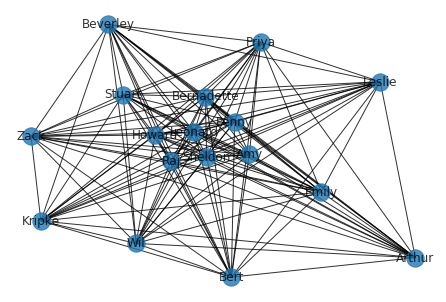

In [47]:
fam_graph = nx.Graph(adj_matrix_familiarity)
fam_graph = nx.relabel_nodes(fam_graph, dict(enumerate(rec_chars)))
nx.draw_spring(fam_graph, with_labels=True,  alpha = 0.8)

In [26]:
df_gos = pd.DataFrame()
count = 0
for c1 in rec_chars:
    for c2 in rec_chars:
        if c1 != c2:
            df_gos.at[count, 'Source'] = c1
            df_gos.at[count, 'Target'] = c2
            df_gos.at[count, 'Nb. scenes'] = 0
            count += 1
            
df_gos

,Source,Target,Nb. scenes
0,Sheldon,Leonard,0.0
1,Sheldon,Penny,0.0
2,Sheldon,Howard,0.0
3,Sheldon,Raj,0.0
4,Sheldon,Leslie,0.0
...,...,...,...
267,Emily,Zack,0.0
268,Emily,Amy,0.0
269,Emily,Priya,0.0
270,Emily,Arthur,0.0


In [27]:
def gossip_set(x):
    gossip = set()
    for c in rec_chars:
        if c.lower() in x:
            gossip.add(c)
    return gossip

In [28]:
df_C_g = df_C.copy()
df_C_g['Gossip'] = df_C_g.Line.apply(gossip_set)
df_C_g

,Episode,Season,Scene,Character,Line,Gossip
2,Series 01 Episode 01 – Pilot Episode,01,A corridor at a sperm bank.,Sheldon,so if a photon is directed through a plane wit...,{Wil}
3,Series 01 Episode 01 – Pilot Episode,01,A corridor at a sperm bank.,Leonard,agreed what s your point,{}
4,Series 01 Episode 01 – Pilot Episode,01,A corridor at a sperm bank.,Sheldon,there s no point i just think it s a good ide...,{}
5,Series 01 Episode 01 – Pilot Episode,01,A corridor at a sperm bank.,Leonard,excuse me,{}
7,Series 01 Episode 01 – Pilot Episode,01,A corridor at a sperm bank.,Leonard,one across is aegean eight down is nabakov t...,{}
...,...,...,...,...,...,...
54320,Series 10 Episode 24 – The Long Distance Disso...,10,Sheldon’s office.,Sheldon,uh breakfast yes lunch no i did have a coug...,{}
54322,Series 10 Episode 24 – The Long Distance Disso...,10,Sheldon’s office.,Sheldon,how thoughtful thank you,{}
54324,Series 10 Episode 24 – The Long Distance Disso...,10,Sheldon’s office.,Sheldon,and i with you question are you seeking a ro...,{}
54326,Series 10 Episode 24 – The Long Distance Disso...,10,Sheldon’s office.,Sheldon,well that would raise a number of problems w...,{}


In [29]:
for _, row in df_C_g.groupby(['Scene', 'Character'])['Gossip'].apply(lambda x: set().union(*x)).reset_index(level='Character').iterrows():
    for c in row['Gossip']:
        if c != row['Character']:
            df_gos.loc[df_gos['Target'] == c, 'Nb. scenes'] += 1

df_gos

,Source,Target,Nb. scenes
0,Sheldon,Leonard,534.0
1,Sheldon,Penny,444.0
2,Sheldon,Howard,333.0
3,Sheldon,Raj,267.0
4,Sheldon,Leslie,25.0
...,...,...,...
267,Emily,Zack,33.0
268,Emily,Amy,207.0
269,Emily,Priya,52.0
270,Emily,Arthur,21.0


In [30]:
df_gos = df_gos[df_gos['Nb. scenes'] != 0]
df_gos['Nb. scenes'] = df_gos['Nb. scenes'].astype(int)
df_gos

,Source,Target,Nb. scenes
0,Sheldon,Leonard,534
1,Sheldon,Penny,444
2,Sheldon,Howard,333
3,Sheldon,Raj,267
4,Sheldon,Leslie,25
...,...,...,...
267,Emily,Zack,33
268,Emily,Amy,207
269,Emily,Priya,52
270,Emily,Arthur,21


In [31]:
gos_graph = nx.from_pandas_edgelist(df_gos, 'Source', 'Target', edge_attr='Nb. scenes', create_using=nx.DiGraph)

Now, answer the following questions:

**Q9**. (5 points) Sheldon claims that every character in the show is familiar with everyone else through at most one intermediary. Based on the familiarity graph, is this true? If not, at most how many intermediaries are needed?

To answer that means to find the longest shortest past between all characters, if this is <= 2, then Sheldon is True as there's at most 1 intermediary node between the 2 characters.

In [48]:
max_len = 0
for _, paths in nx.shortest_path_length(fam_graph):
    for leng in paths.values():
        max_len = max(max_len, leng)

max_len

1

Sheldon is right.

**Q10**. (5 points) Who is the character through whom the largest number of these indirect familiarities happen? Calculate an appropriate centrality metric on the familiarity graph to answer this question. You can use the package networkx for this section.

In [50]:
pagerank = nx.pagerank(fam_graph)
pagerank

{'Sheldon': 0.14861511827039892,
 'Leonard': 0.14408354462233952,
 'Penny': 0.1136481628638292,
 'Howard': 0.1248760715403478,
 'Raj': 0.11511291406605557,
 'Leslie': 0.016261190730511254,
 'Kripke': 0.018330525621001313,
 'Beverley': 0.019106215937125106,
 'Stuart': 0.03978447427256619,
 'Bernadette': 0.06944021956151414,
 'Wil': 0.021247428675598434,
 'Zack': 0.020727104934781103,
 'Amy': 0.07367827175806602,
 'Priya': 0.023200781014241983,
 'Arthur': 0.012510790186446977,
 'Bert': 0.017124611222141713,
 'Emily': 0.02225257472303473}

The character is Sheldon.

**Q11**. (2.5 points) Another claim of Sheldon's is that every recurrent character in the show gossips about all the other recurrent characters. What property of the gossip graph would correspond to this? Does the gossip graph possess that property? If not, then is it the case that for every pair of recurrent characters, at least one gossips about the other? What property would this correspond to?

In [51]:
nx.transitivity(gos_graph)

1.0

**Q12**. (5 points) Use the gossip graph and the familiarity graph to figure out if for every pair of recurrent characters, one of them has gossiped about the other if and only if they know each other. Explain your method - the simpler, the better.

In [53]:
def know_imply_gossip(familirity, gossip):
    for a, b in familirity.edges:
        if (a, b) not in gossip.edges and (b, a) not in gossip.edges:
            print((a, b), 'isnt in gossip edges')
            return False
    return True

def gossip_imply_know(familirity, gossip):
    for e in gossip.edges:
        if e not in familirity.edges:
            print(e, 'isnt in familirity edges')
            return False
    return True

know_imply_gossip(fam_graph, gos_graph), gossip_imply_know(fam_graph, gos_graph)

(True, True)

## Task D: The Detective's Hat (30 points)

Sheldon claims that given a dialogue line, he can, with an accuracy of above 70%, say whether it's by himself or by someone else. Leonard contests this claim, since he believes that this claimed accuracy is too high. Leonard also suspects that it's easier for Sheldon to distinguish the lines that _aren't_ his, rather than those that _are_. We want you to put on the (proverbial) detective's hat and to investigate this claim.

**Q13**. (7.5 points) Divide the set of all dialogue lines into two subsets: the training set, consisting of all the seasons except the last two, and the test set, consisting of the last two seasons. Each of your data points (which is one row of your matrix) is one **dialogue line**. Now, use the scikit-learn class **TfIdfVectorizer** to create TF-IDF representations for the data points in your training and test sets. Note that since you're going to train a machine learning model, everything used in the training needs to be independent of the test set. As a preprocessing step, remove stopwords and words that appear only once from your vocabulary. Use the simple tokenizer provided in `helpers/helper_functions.py` as an input to the TfidfVectorizer class, and use the words provided in `helpers/stopwords.txt` as your stopwords.

In [144]:
df['Season'] = df['Season'].astype(int)
df_train = df[df['Season'] <= 8].copy()
df_test = df[df['Season'] > 8].copy()

In [145]:
with open('helpers/stopwords.txt', 'r', encoding='utf-8') as f:
    STOPWORDS = [w.strip() for w in f.readlines()]

In [146]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(tokenizer=simple_tokeniser, stop_words=STOPWORDS, min_df=2)

X_train = vectorizer.fit_transform(df_train.Line)
X_test = vectorizer.transform(df_test.Line)

**Q14**. (5 points) Find the set of all words in the training set that are only uttered by Sheldon. Is it possible for Sheldon to identify himself only based on these? Use the test set to assess this possibility, and explain your method.

In [147]:
set_sheldon = set(df_train[df_train['Character'] == 'Sheldon']['Line'].str.split('\W+').explode())
set_others = set(df_train[df_train['Character'] != 'Sheldon']['Line'].str.split('\W+').explode())

set_only_sheldon = set_sheldon - set_others
len(set_only_sheldon)

5151

In [148]:
def by_sheldon(x):
    for token in x.split():
        if token in set_only_sheldon:
            return True
    return False

In [149]:
df_test_c = df_test.copy()
df_test_c['Is Sheldon'] = df_test_c['Line'].apply(by_sheldon)

In [150]:
acc = (df_test_c['Is Sheldon'] == (df_test_c.Character == 'Sheldon')).mean()*100
acc

77.01838922214573

**Q15**. (17.5 points) Now, perform singular value decomposition (SVD) on the training TF-IDF matrix, and calculate a **25-dimensional approximation** for both the training and test TF-IDF matrices (you can do this using scikit-learn's **TruncatedSVD** class). Then, train a logistic regression classifier with 10-fold cross-validation (using the scikit-learn **LogisticRegressionCV** class) on the output of the SVD that given a dialogue line, tells you whether it's by Sheldon or by someone else.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**i)** (7.5 points) Report precision, recall and F1-score for both classes (Sheldon and not-Sheldon), as well as accuracy, of your classifier on the training set and the test set. You need to implement the calculation of the evaluation measures (precision, etc.) yourself -- using the scikit-learn functions for them is not allowed.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**ii)** (5 points) What difference do you observe between the model's scores on the training and test sets? What could you infer from the amount of difference you see? What about the difference between scores on the two classes? Given the performance of your classifier, is Leonard right that the accuracy Sheldon claims is unattainable? What about his suspicions about the lines that Sheldon can and cannot distinguish?
    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**iii)** (2.5 points) List 10 of the most extreme false positives and 10 of the most extreme false negatives, in terms of the probabilities predicted by the logistic regression model. What are common features of false positives? What about the false negatives?
    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**iv)** (2.5 points) What is the most important feature in the model? What are the 5 most important words in this feature? _Hint: Think of the definition of an SVD, and that you did an SVD on the TF-IDF matrix with dialogue lines as rows and words as columns. You have projected the original data points onto a 25-dimensional subspace -- you need to look at the unit vectors you used for the projection._

In [151]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=25)

X_train = svd.fit_transform(X_train)
X_test = svd.transform(X_test)

y_train = df_train.Character == 'Sheldon'
y_test = df_test.Character == 'Sheldon'

In [152]:
from sklearn.linear_model import LogisticRegressionCV

lr = LogisticRegressionCV(cv=10)
lr.fit(X_train, y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=10, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [153]:
def accuracy(pred, target):
    return (pred == target).mean()

def precision(pred, target, label):
    ''' Compute either tp / (tp + fp) (label=True) or tn / (tn + fn) (label=False)'''
    true_pred_label = ((pred == label) & (target == label)).sum()
    pred_label = (pred == label).sum()
    return true_pred_label / pred_label
    
def recall(pred, target, label):
    ''' Compute either tp / (tp + fp) (label=True) or tn / (tn + fn) (label=False)'''
    true_pred_label = ((pred == label) & (target == label)).sum()
    pred_label = (target == label).sum()
    return true_pred_label / pred_label

def f1_score(precision, recall):
    return (2 * precision * recall) / (precision + recall)

In [154]:
pred_train = lr.predict(X_train)
pred_test = lr.predict(X_test)

In [160]:
def print_measures(label):
    print(f'Sheldon: {label}')
    
    prec_train = precision(pred_train, y_train, label)
    print(f'Precision train: {prec_train}')
    
    rec_train = recall(pred_train, y_train, label)
    print(f'Recall train: {rec_train}')
    
    f1_train = f1_score(prec_train, rec_train)
    print(f'F1 score train: {f1_train}')
    
    prec_test = precision(pred_test, y_test, label)
    print(f'Precision test: {prec_test}')
    
    rec_test = recall(pred_test, y_test, label)
    print(f'Recall test: {rec_test}')
    
    f1_test = f1_score(prec_test, rec_test)
    print(f'F1 score test: {f1_test}')

In [161]:
print_measures(True)
print_measures(False)

print()

acc_train = accuracy(pred_train, y_train)
print(f'Accuracy train: {acc_train}')

acc_test = accuracy(pred_test, y_test)
print(f'Accuracy test: {acc_test}')

Sheldon: True
Precision train: 0.5362776025236593
Recall train: 0.017985611510791366
F1 score train: 0.03480397174736411
Precision test: 0.4305555555555556
Recall test: 0.013857845328565042
F1 score test: 0.026851450844521438
Sheldon: False
Precision train: 0.7548335974643423
Recall train: 0.9948825065274152
F1 score train: 0.8583915296237892
Precision test: 0.7815192631474696
Recall test: 0.9948310640443772
F1 score test: 0.8753674635309778

Accuracy train: 0.7530188333289677
Accuracy test: 0.7790343199921329


In [170]:
probs = lr.predict_proba(X_test)

(10169, 2)

In [169]:
fp_idx = probs[:, 0].argsort()[::-1][pred_test & ~y_test][:10]
fn_idx = probs[:, 1].argsort()[::-1][~pred_test & y_test][:10]

In [178]:
print('Top 10 worst False positive')
for idx in fp_idx:
    print('Text:', df_test.iloc[idx]['Line'], 'Proba:', probs[idx])

Top 10 worst False positive
Text: hi  Proba: [0.95659444 0.04340556]
Text: hey  looks like i got stood up  so i m gonna head out  Proba: [0.93760564 0.06239436]
Text: i really appreciate it  uh  can you hold on one second  hey  so  howard  what s the bathroom situation gonna be  Proba: [0.92556908 0.07443092]
Text: sure  sure  or we could take you to get a bikini wax  Proba: [0.86754131 0.13245869]
Text: well  comic con tickets go on sale this friday  and i was hoping i could go with the guys  but before you say anything  i ll make up for being gone by doing everything around here  i mean everything  i m even gonna answer for you  yes  howard  you can go  Proba: [0.85944698 0.14055302]
Text: that sounds really nice  Proba: [0.85848036 0.14151964]
Text: oh  no  no  come on  i have a friend in you  you said so  Proba: [0.82623101 0.17376899]
Text: they complete my ensemble  what do you want  Proba: [0.79498477 0.20501523]
Text: well  i ve  you know  seen him without pants on  Proba: [0.7

In [180]:
print('Top 10 worst False negative')
for idx in fn_idx:
    print('Text:', df_test.iloc[idx]['Line'], 'Proba:', probs[idx])

Top 10 worst False negative
Text: leonard  Proba: [0.30435409 0.69564591]
Text: leonard  Proba: [0.30435409 0.69564591]
Text: penny  Proba: [0.37988612 0.62011388]
Text: penny  what s up  Proba: [0.37988612 0.62011388]
Text: leonard  wait  Proba: [0.47587665 0.52412335]
Text: hello  Proba: [0.47950417 0.52049583]
Text: hello  Proba: [0.47950417 0.52049583]
Text: oh  hello  Proba: [0.47950417 0.52049583]
Text: hello  Proba: [0.47950417 0.52049583]
Text: hello  Proba: [0.47950417 0.52049583]


In [181]:
lr.coef_

array([[-5.57276155e+00, -2.70817596e+00, -2.01238151e+00,
        -1.03804574e+00,  9.11642685e-01, -8.07089067e-01,
         1.11607563e-01, -8.58423753e-01,  5.52692542e-04,
         6.97618726e-01, -1.12845684e+00, -5.29315117e-03,
        -9.25277632e-01, -8.32749943e-01, -6.43515453e-01,
         2.10872605e+00, -8.20050049e-01,  1.17322916e-02,
        -3.83998964e-01, -1.37821151e+00, -2.50803661e+00,
        -9.97638283e-01, -7.45047355e-01,  6.55406717e-01,
         3.56435355e-01]])

The first one, which makes sense since we did SVD.

In [182]:
print('Top 5 words in Feature 0')
for i, idx in enumerate(svd.components_[0].argsort()[::-1][:5]):
    for term, term_idx in vectorizer.vocabulary_.items():
        if term_idx == idx:
            print('Word rank:', i+1, 'Word:', term)

Top 5 words in Feature 0
Word rank: 1 Word: sheldon
Word rank: 2 Word: hey
Word rank: 3 Word: know
Word rank: 4 Word: well
Word rank: 5 Word: go
